## DATA ANALYTICS GROCERY SALE

Import Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("D:/Academic Project/Portofolio Data Analyst_Grocery Data/SQL/BlinkIT Grocery Data.csv")

### **Samples Data**

In [13]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [14]:
data.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Size Data**

In [15]:
print(f"Size of dataset : {data.shape}")

Size of dataset : (8523, 12)


### **Field Info**

In [16]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Data Cleaning**

In [18]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'low fat' : 'Low Fat',
                                                                'LF' : 'Low Fat',
                                                                'reg' : 'Regular'})
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [20]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

## Business Requirement

### **KPI's**

In [21]:
#Total Sales
Total_Sales = data['Sales'].sum()
Avg_Sales = data['Sales'].mean()
No_Items_Sold = data['Sales'].count()
Avg_Rating = data['Rating'].mean()

print("KPI Grocery Store")
print("==========================================")
print(f"Total Sales Grocery Store \t\t: ${Total_Sales:,.2f}")
print(f"Average Sales Grocery Store \t\t: ${Avg_Sales:,.0f}")
print(f"Number of Items Sold Grocery Store \t: {No_Items_Sold:.0f}")
print(f"Average Rating Grocery Store \t\t: {Avg_Rating:.1f}")

KPI Grocery Store
Total Sales Grocery Store 		: $1,201,681.49
Average Sales Grocery Store 		: $141
Number of Items Sold Grocery Store 	: 8523
Average Rating Grocery Store 		: 4.0


### **Chart Requirement**

**Total Sales by Fat Content**

Item Fat Content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64


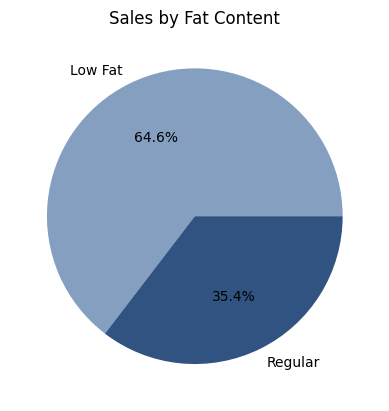

In [22]:
sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum()

print(sales_by_fat)
plt.pie(sales_by_fat, labels=sales_by_fat.index, colors= ['#859FC0', '#315381'], autopct='%1.1f%%')
plt.title('Sales by Fat Content')
plt.show()

**Total Sales by Item Type**

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Canned                    90706.7290
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1670
Breads                    35379.1198
Hard Drinks               29334.6806
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


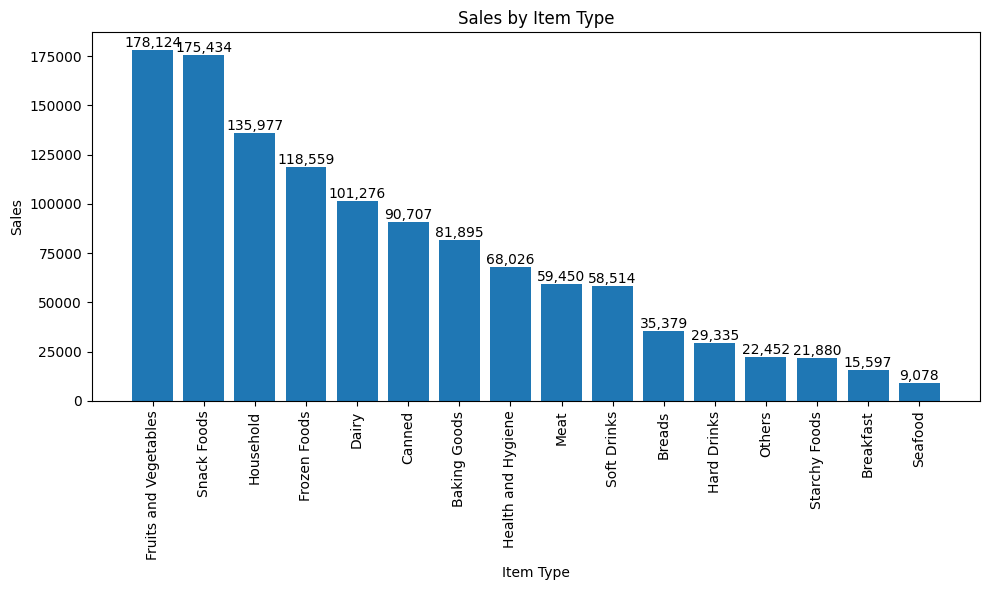

In [23]:
sales_by_item_type = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
print(sales_by_item_type)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom')

plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


**Fat Content by Outlet Tier for Sales**

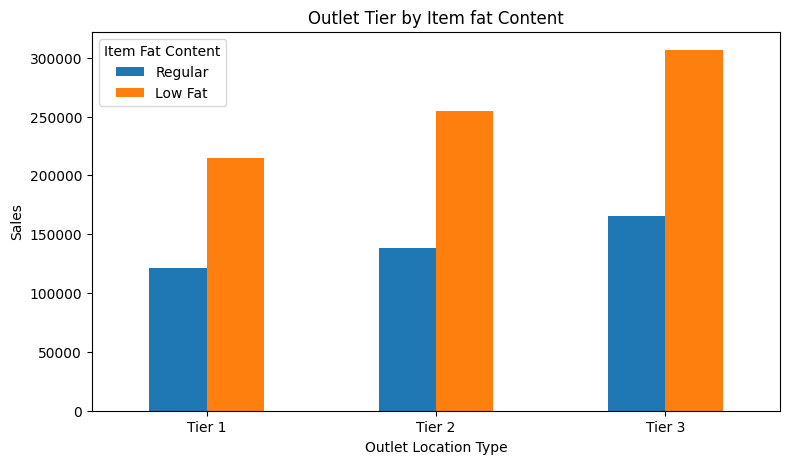

In [24]:
group = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
group = group[['Regular', 'Low Fat']]

ax = group.plot(kind='bar', figsize=(8,5), title = "Outlet Tier by Item fat Content")
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.legend(title = "Item Fat Content")
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

**Total Sales by Outlet Establishment**

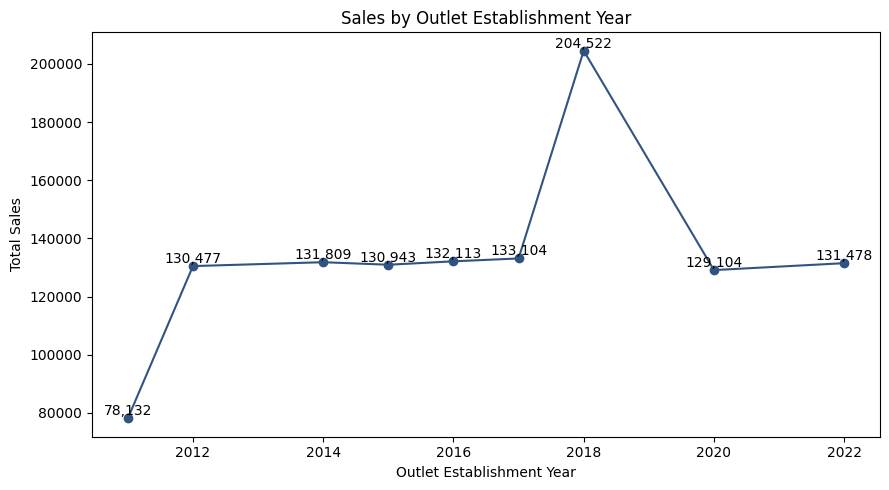

In [25]:
sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='#315381')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Sales By Outlet Size**

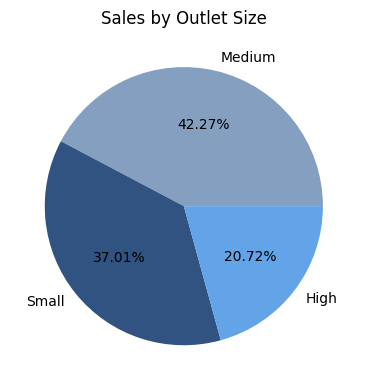

In [32]:
sales_by_size = data.groupby('Outlet Size')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, colors= ['#859FC0', '#315381', "#62A4E7"], autopct='%1.2f%%')
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()


**Sales by outlet location**

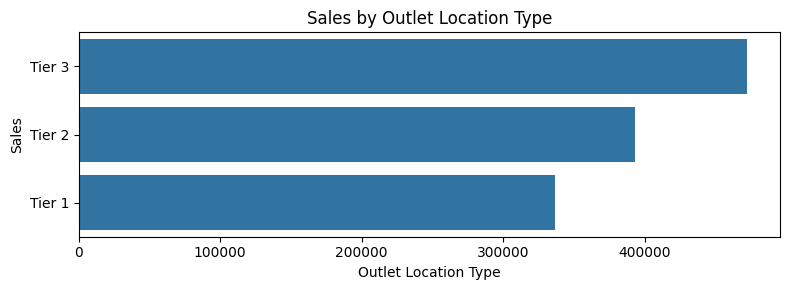

In [36]:
sales_by_location = data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)


plt.figure(figsize=(8,3))

ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()